In [1]:
import pandas as pd
import numpy as np 
import os

In [2]:
direct_results = pd.read_csv("results_direct.csv")
direct_results = direct_results[direct_results["learning_rate"] == 8e-5]

In [3]:
def print_latex(df: pd.DataFrame):
    # df = df[["lag", "downsample_factor", "filter_time", "learning_rate", "batch_size", "r2", "mse"]].copy()
    if "learning_rate" in df.keys(): 
        df["learning_rate"] = df["learning_rate"].map(lambda x: f"{(x * 1_0000):.1f}")
        df.rename(columns={"learning_rate": "$\\eta (\\cdot 10^{-4})$"}, inplace=True)
    if "filter_time" in df.keys(): 
        df.rename(columns={"filter_time": "$T_f$"}, inplace=True)
    if "enum_feat" in df.keys(): 
        df.rename(columns={"enum_feat": "$X$"}, inplace=True)
    df["r2"] = df["r2"].map(lambda x: f"{x:.3f}")
    df["r2_flex_ext"] = df["r2_flex_ext"].map(lambda x: f"{x:.3f}")
    df["r2_pro_sup"] = df["r2_pro_sup"].map(lambda x: f"{x:.3f}")
    df["mse"] = df["mse"].map(lambda x: f"{round(x)}")
    df.rename(columns={"lag": "Lag", 
                       "downsample_factor": "$q$", 
                       "batch_size": "$B$", 
                       "r2": "$R^2$", 
                       "mse": "\\ac{MSE}", 
                       "r2_flex_ext": "$R_{Flex\\_Ext}^2$", 
                       "r2_pro_sup": "$R_{Pro\\_Sup}^2$"}, inplace=True)
    print(df.to_latex(index=False))

In [4]:
print_latex(direct_results[["lag", "downsample_factor", "filter_time", "batch_size", "r2_flex_ext", "r2_pro_sup", "r2", "mse"]].copy())

\begin{tabular}{rrrrllll}
\toprule
Lag & $q$ & $T_f$ & $B$ & $R_{Flex\_Ext}^2$ & $R_{Pro\_Sup}^2$ & $R^2$ & \ac{MSE} \\
\midrule
1 & 5 & 20 & 128 & 0.794 & 0.570 & 0.682 & 474 \\
3 & 1 & 50 & 128 & 0.866 & 0.694 & 0.780 & 331 \\
5 & 1 & 50 & 128 & 0.860 & 0.610 & 0.735 & 407 \\
3 & 5 & 50 & 128 & 0.870 & 0.679 & 0.775 & 342 \\
3 & 5 & 20 & 32 & 0.890 & 0.694 & 0.792 & 319 \\
1 & 5 & 50 & 128 & 0.776 & 0.560 & 0.668 & 492 \\
3 & 3 & 50 & 32 & 0.871 & 0.690 & 0.780 & 332 \\
3 & 3 & 20 & 32 & 0.891 & 0.694 & 0.792 & 320 \\
1 & 3 & 50 & 32 & 0.774 & 0.565 & 0.670 & 488 \\
1 & 1 & 50 & 128 & 0.766 & 0.569 & 0.667 & 489 \\
3 & 3 & 20 & 128 & 0.888 & 0.703 & 0.796 & 313 \\
1 & 1 & 20 & 128 & 0.793 & 0.575 & 0.684 & 470 \\
1 & 3 & 50 & 128 & 0.777 & 0.564 & 0.670 & 488 \\
1 & 3 & 20 & 128 & 0.798 & 0.581 & 0.689 & 463 \\
3 & 1 & 50 & 32 & 0.870 & 0.688 & 0.779 & 334 \\
5 & 1 & 20 & 32 & 0.877 & 0.606 & 0.742 & 402 \\
5 & 1 & 20 & 128 & 0.878 & 0.602 & 0.740 & 406 \\
3 & 5 & 50 & 32 & 0.870 & 0

In [5]:
direct_results

,lag,downsample_factor,filter_time,lstm_layers,learning_rate,batch_size,r2_flex_ext,r2_pro_sup,r2,mse
0,1,5,20,"(64, 32)",0.00008,128,0.794433,0.569746,0.682089,474.34995
1,3,1,50,"(64, 32)",0.00008,128,0.865564,0.694060,0.779813,331.23987
2,5,1,50,"(64, 32)",0.00008,128,0.859892,0.609985,0.734938,406.87564
3,3,5,50,"(64, 32)",0.00008,128,0.869941,0.679096,0.774519,342.20038
4,3,5,20,"(64, 32)",0.00008,32,0.890059,0.694413,0.792237,319.21005
5,1,5,50,"(64, 32)",0.00008,128,0.775785,0.559885,0.667833,491.87990
6,3,3,50,"(64, 32)",0.00008,32,0.870505,0.690308,0.780407,332.14820
7,3,3,20,"(64, 32)",0.00008,32,0.890512,0.693522,0.792018,319.77133
8,1,3,50,"(64, 32)",0.00008,32,0.773598,0.565434,0.669516,488.07117
9,1,1,50,"(64, 32)",0.00008,128,0.766060,0.568885,0.667472,488.65472


In [6]:
# PARAMETERS = ["lag", "downsample_factor", "filter_time", "batch_size"]

def duplicates(df: pd.DataFrame, inspect, key: str): 
    # params = PARAMETERS.copy()
    params = inspect
    params.remove(key)
    param_df = df[params]
    x = df.groupby(param_df.columns.tolist())
    res = []
    for info, item in x: 
        y = item[[key, "r2"]].to_dict("list")
        res.append(dict(zip(y[key], y["r2"])))
    res = pd.DataFrame(res)
    res = res[sorted(res.keys().to_list())]
    return res



In [7]:
from typing import Sequence
import matplotlib.pyplot as plt

def plot_results(results: pd.DataFrame, inspect: Sequence[str], export_latex: bool = False): 
    fig, axs = plt.subplots(2, 2, sharey=True)
    for param, ax in zip(inspect, axs.flatten()): 
        res = duplicates(results, list(inspect), param)
        ax.set_title(param)
        if export_latex: 
            export_data = res.T
            export_data["mean"] = export_data.mean(axis=1)
            export_data.to_csv(os.path.join("/home/finn/Documents/LatexMA/data/direct_results/", param), index_label="i")
        ax.plot(res.T, c="orange")
        ax.plot(res.keys(), res.dropna().values.mean(axis=0))
        ax.set_xticks(res.keys())
    plt.tight_layout()
    plt.show()


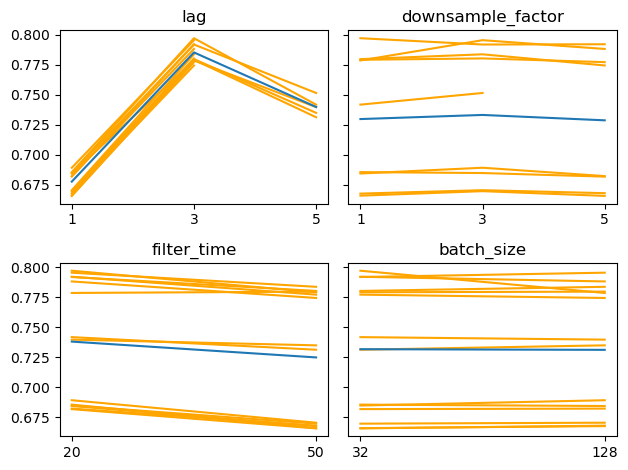

In [8]:
plot_results(direct_results, ("lag", "downsample_factor", "filter_time", "batch_size"), export_latex=True)

In [9]:
feat_results = pd.read_csv("results_feat.csv")

In [10]:
feat_results['enum_feat'] = pd.factorize(feat_results['features'])[0]

In [11]:
feat_results.drop_duplicates("enum_feat")[["features", "enum_feat"]]

,features,enum_feat
0,"('mav', ('zc', 0.003), ('ssc', 0.0003), 'wl')",0
1,"('mav', ('ssc', 0.0003))",1
2,"('rms', ('zc', 0.003), ('ssc', 0.0003))",2
3,"('rms',)",3


In [12]:
feat_results

,lag,features,learning_rate,batch_size,r2_flex_ext,r2_pro_sup,r2,mse,enum_feat
0,1,"('mav', ('zc', 0.003), ('ssc', 0.0003), 'wl')",0.00008,128,0.856186,0.657063,0.756624,368.51440,0
1,1,"('mav', ('ssc', 0.0003))",0.00008,32,0.774816,0.568911,0.671863,484.44998,1
2,5,"('rms', ('zc', 0.003), ('ssc', 0.0003))",0.00010,32,0.913655,0.725740,0.819697,280.28012,2
3,5,"('rms',)",0.00008,32,0.859854,0.638897,0.749375,381.70980,3
4,5,"('rms',)",0.00008,128,0.851714,0.639299,0.745505,385.26140,3
5,3,"('mav', ('ssc', 0.0003))",0.00008,128,0.862592,0.656506,0.759549,365.42572,1
6,5,"('rms', ('zc', 0.003), ('ssc', 0.0003))",0.00008,128,0.914930,0.723500,0.819214,281.62085,2
7,5,"('rms', ('zc', 0.003), ('ssc', 0.0003))",0.00010,128,0.916151,0.726367,0.821258,278.53802,2
8,3,"('rms',)",0.00008,32,0.820277,0.600068,0.710174,434.91040,3
9,5,"('mav', ('ssc', 0.0003))",0.00010,32,0.886843,0.693336,0.790089,321.35500,1


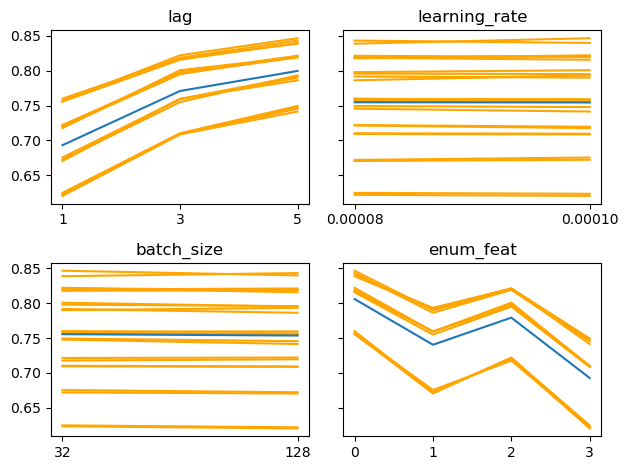

In [13]:
plot_results(feat_results, ("lag", "learning_rate", "batch_size", "enum_feat"))

In [15]:
print_latex(feat_results[["lag", "enum_feat", "learning_rate", "batch_size", "r2_flex_ext", "r2_pro_sup", "r2", "mse"]].copy())

\begin{tabular}{rrlrllll}
\toprule
Lag & $X$ & $\eta (\cdot 10^{-4})$ & $B$ & $R_{Flex\_Ext}^2$ & $R_{Pro\_Sup}^2$ & $R^2$ & \ac{MSE} \\
\midrule
1 & 0 & 0.8 & 128 & 0.856 & 0.657 & 0.757 & 369 \\
1 & 1 & 0.8 & 32 & 0.775 & 0.569 & 0.672 & 484 \\
5 & 2 & 1.0 & 32 & 0.914 & 0.726 & 0.820 & 280 \\
5 & 3 & 0.8 & 32 & 0.860 & 0.639 & 0.749 & 382 \\
5 & 3 & 0.8 & 128 & 0.852 & 0.639 & 0.746 & 385 \\
3 & 1 & 0.8 & 128 & 0.863 & 0.657 & 0.760 & 365 \\
5 & 2 & 0.8 & 128 & 0.915 & 0.723 & 0.819 & 282 \\
5 & 2 & 1.0 & 128 & 0.916 & 0.726 & 0.821 & 279 \\
3 & 3 & 0.8 & 32 & 0.820 & 0.600 & 0.710 & 435 \\
5 & 1 & 1.0 & 32 & 0.887 & 0.693 & 0.790 & 321 \\
5 & 1 & 0.8 & 32 & 0.893 & 0.690 & 0.792 & 321 \\
3 & 2 & 0.8 & 32 & 0.899 & 0.697 & 0.798 & 313 \\
5 & 1 & 1.0 & 128 & 0.888 & 0.699 & 0.793 & 316 \\
3 & 2 & 1.0 & 128 & 0.897 & 0.694 & 0.795 & 317 \\
5 & 0 & 1.0 & 128 & 0.925 & 0.755 & 0.840 & 249 \\
1 & 2 & 1.0 & 128 & 0.826 & 0.613 & 0.720 & 421 \\
3 & 0 & 1.0 & 32 & 0.915 & 0.729 & 0.822 & 27